In [8]:
import numpy as np
import matplotlib.pyplot as plt
# assume some unit guassian 10-D input data
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10
nonlinearities = ['relu']*len(hidden_layer_sizes)

In [11]:
act = {'relu': lambda x: np.maximum(0,x), 'tanh': lambda x: np.tanh(x)}
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] # input at this layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
#     W = np.random.randn(fan_in, fan_out) * 0.01 # layer initialization (too small) [collapse]
#     W = np.random.randn(fan_in, fan_out) * 1.0 # layer initialization (too big) [saturate]
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in) # Xavier Initialization (work well with tanh)
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2) # work better with relu
    H = np.dot(X, W)
    H = act[nonlinearities[i]](H)
    Hs[i] = H # cache result on this layer

input layer had mean 0.003786 and std 0.998981
hidden layer 1 had mean 0.564535 and std 0.825576
hidden layer 2 had mean 0.584848 and std 0.853782
hidden layer 3 had mean 0.582916 and std 0.834441
hidden layer 4 had mean 0.560414 and std 0.824518
hidden layer 5 had mean 0.543239 and std 0.816986
hidden layer 6 had mean 0.578130 and std 0.839178
hidden layer 7 had mean 0.581208 and std 0.845606
hidden layer 8 had mean 0.601035 and std 0.889420
hidden layer 9 had mean 0.595591 and std 0.874511
hidden layer 10 had mean 0.606017 and std 0.876578


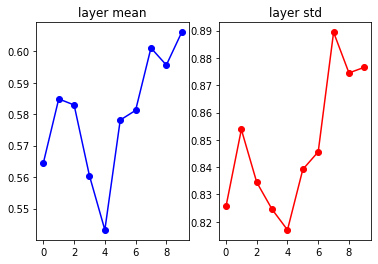

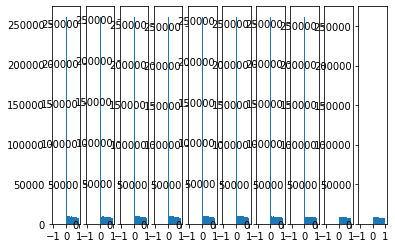

In [12]:
# look at distributions at each layer
print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i,H in Hs.items()]
layer_stds = [np.std(H) for i,H in Hs.items()]
for i,H in Hs.items():
    print('hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))
    
# plot the means and standard derivations
plt.figure()
plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer std')

# plot the raw distributions
plt.figure()
for i,H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(-1, 1))